In [51]:
import pandas as pd

# Read parquet file
math_val = pd.read_parquet("../eval_results/Responses_OLD_L1-Qwen-1.5B-Max_val.parquet")
math_val

,data_source,prompt,ability,reward_model,extra_info,responses,token_lengths
0,MATH,[{'content': 'Josh and Mike live 13 miles apar...,math,{'ground_truth': 'Because $\text{(rate)(time)}...,"{'index': 0, 'level': 4.0, 'split': 'val', 'ty...","[)\nOkay, so I have this problem here: Josh an...",[1242]
1,MATH,[{'content': 'Simplify the expression $(9x^2+3...,math,"{'ground_truth': 'Combining like terms, we fin...","{'index': 1, 'level': 3.0, 'split': 'val', 'ty...","[Okay, so I have this expression to simplify: ...",[1288]
2,MATH,[{'content': 'The arithmetic mean (or average)...,math,{'ground_truth': 'We know that $\frac{A+B+C}{3...,"{'index': 2, 'level': 3.0, 'split': 'val', 'ty...","[Okay, so I have this problem here about the a...",[1159]
3,MATH,[{'content': 'Eleven pencils cost as much as t...,math,{'ground_truth': 'If seven pens costs $\$9.24$...,"{'index': 3, 'level': 2.0, 'split': 'val', 'ty...","[ Good luck.\nOkay, so I have this problem her...",[969]
4,MATH,"[{'content': 'Assuming $x\ne0$, simplify $\fra...",math,{'ground_truth': 'We have \begin{align*} \fra...,"{'index': 4, 'level': 2.0, 'split': 'val', 'ty...","[Okay, so I have this problem here: I need to ...",[1018]
...,...,...,...,...,...,...,...
4495,MATH,[{'content': 'Below is the graph of an ellipse...,math,{'ground_truth': 'We see that the endpoints of...,"{'index': 4495, 'level': 3.0, 'split': 'val', ...","[]\nOkay, so I have this problem about an elli...",[1476]
4496,MATH,[{'content': 'Find the center of the ellipse w...,math,{'ground_truth': 'Completing the square in $x$...,"{'index': 4496, 'level': 1.0, 'split': 'val', ...",[ To find the center of the ellipse given by t...,[1064]
4497,MATH,[{'content': 'Let a sequence be defined as fol...,math,{'ground_truth': 'The fact that the equation $...,"{'index': 4497, 'level': 5.0, 'split': 'val', ...","[[/]\nOkay, so I have this problem here about ...",[2094]
4498,MATH,[{'content': 'What is the area of the region i...,math,{'ground_truth': 'Because $\lfloor x \rfloor$ ...,"{'index': 4498, 'level': 4.0, 'split': 'val', ...","[[/]\nOkay, so I need to find the area of the ...",[1565]


In [52]:
from utils import last_boxed_only_string, remove_boxed
import numpy as np

def extract_answer(solution_str: str) -> str:
    """Extract the final boxed answer from a solution string."""
    return remove_boxed(last_boxed_only_string(solution_str))

math_val["level"] = math_val["extra_info"].apply(lambda d: d.get("level") if isinstance(d, dict) else None)
math_val["type"] = math_val["extra_info"].apply(lambda d: d.get("type") if isinstance(d, dict) else None)
math_val["ground_truth"] = math_val["reward_model"].apply(lambda d: d["ground_truth"])
math_val["responses"] = math_val["responses"].apply(lambda x: x[0] if isinstance(x, np.ndarray) and len(x) == 1 else x)
math_val["answer"] = math_val["responses"].apply(lambda r: extract_answer(r) if r else None)
math_val["token_lengths"] = math_val["token_lengths"].apply(lambda x: x[0] if isinstance(x, np.ndarray) and len(x) == 1 else x)

math_val

,data_source,prompt,ability,reward_model,extra_info,responses,token_lengths,level,type,ground_truth,answer
0,MATH,[{'content': 'Josh and Mike live 13 miles apar...,math,{'ground_truth': 'Because $\text{(rate)(time)}...,"{'index': 0, 'level': 4.0, 'split': 'val', 'ty...",")\nOkay, so I have this problem here: Josh and...",1242,4.0,Algebra,Because $\text{(rate)(time)} = \text{(distance...,5
1,MATH,[{'content': 'Simplify the expression $(9x^2+3...,math,"{'ground_truth': 'Combining like terms, we fin...","{'index': 1, 'level': 3.0, 'split': 'val', 'ty...","Okay, so I have this expression to simplify: (...",1288,3.0,Algebra,"Combining like terms, we find that \begin{ali...",7x^5 + 12x^2 + 3x + 9
2,MATH,[{'content': 'The arithmetic mean (or average)...,math,{'ground_truth': 'We know that $\frac{A+B+C}{3...,"{'index': 2, 'level': 3.0, 'split': 'val', 'ty...","Okay, so I have this problem here about the ar...",1159,3.0,Algebra,"We know that $\frac{A+B+C}{3} = 10$, thus, $A+...",14
3,MATH,[{'content': 'Eleven pencils cost as much as t...,math,{'ground_truth': 'If seven pens costs $\$9.24$...,"{'index': 3, 'level': 2.0, 'split': 'val', 'ty...","Good luck.\nOkay, so I have this problem here...",969,2.0,Algebra,"If seven pens costs $\$9.24$, then each pen co...",36
4,MATH,"[{'content': 'Assuming $x\ne0$, simplify $\fra...",math,{'ground_truth': 'We have \begin{align*} \fra...,"{'index': 4, 'level': 2.0, 'split': 'val', 'ty...","Okay, so I have this problem here: I need to s...",1018,2.0,Algebra,We have \begin{align*}\n\frac{12}{x \cdot x} ...,10
...,...,...,...,...,...,...,...,...,...,...,...
4495,MATH,[{'content': 'Below is the graph of an ellipse...,math,{'ground_truth': 'We see that the endpoints of...,"{'index': 4495, 'level': 3.0, 'split': 'val', ...","]\nOkay, so I have this problem about an ellip...",1476,3.0,Intermediate Algebra,We see that the endpoints of the major axis of...,-\dfrac{4}{3}
4496,MATH,[{'content': 'Find the center of the ellipse w...,math,{'ground_truth': 'Completing the square in $x$...,"{'index': 4496, 'level': 1.0, 'split': 'val', ...",To find the center of the ellipse given by th...,1064,1.0,Intermediate Algebra,"Completing the square in $x$ and $y,$ we get\n...","(2, 1)"
4497,MATH,[{'content': 'Let a sequence be defined as fol...,math,{'ground_truth': 'The fact that the equation $...,"{'index': 4497, 'level': 5.0, 'split': 'val', ...","[/]\nOkay, so I have this problem here about a...",2094,5.0,Intermediate Algebra,The fact that the equation $a_{n+1}a_{n-1} = a...,2007
4498,MATH,[{'content': 'What is the area of the region i...,math,{'ground_truth': 'Because $\lfloor x \rfloor$ ...,"{'index': 4498, 'level': 4.0, 'split': 'val', ...","[/]\nOkay, so I need to find the area of the r...",1565,4.0,Intermediate Algebra,Because $\lfloor x \rfloor$ and $\lfloor y \rf...,10


In [55]:
import sys
import os

# Add the project root (one level up from explore/)
project_root = os.path.abspath(os.path.join(os.getcwd(), ".."))
if project_root not in sys.path:
    sys.path.insert(0, project_root)

import importlib
import scripts.math_reward

importlib.reload(scripts.math_reward)

from scripts.math_reward import math_reward_fn

target_tokens = 3600

math_val["reward"] = math_val.apply(
    lambda row: math_reward_fn(row["responses"], row["ground_truth"], target_tokens, row["token_lengths"]), 
    axis=1
)

math_val["is_correct"] = math_val["reward"] > 0

math_val

,data_source,prompt,ability,reward_model,extra_info,responses,token_lengths,level,type,ground_truth,answer,reward,is_correct
0,MATH,[{'content': 'Josh and Mike live 13 miles apar...,math,{'ground_truth': 'Because $\text{(rate)(time)}...,"{'index': 0, 'level': 4.0, 'split': 'val', 'ty...",")\nOkay, so I have this problem here: Josh and...",1242,4.0,Algebra,Because $\text{(rate)(time)} = \text{(distance...,5,0.980356,True
1,MATH,[{'content': 'Simplify the expression $(9x^2+3...,math,"{'ground_truth': 'Combining like terms, we fin...","{'index': 1, 'level': 3.0, 'split': 'val', 'ty...","Okay, so I have this expression to simplify: (...",1288,3.0,Algebra,"Combining like terms, we find that \begin{ali...",7x^5 + 12x^2 + 3x + 9,0.978791,True
2,MATH,[{'content': 'The arithmetic mean (or average)...,math,{'ground_truth': 'We know that $\frac{A+B+C}{3...,"{'index': 2, 'level': 3.0, 'split': 'val', 'ty...","Okay, so I have this problem here about the ar...",1159,3.0,Algebra,"We know that $\frac{A+B+C}{3} = 10$, thus, $A+...",14,0.982894,True
3,MATH,[{'content': 'Eleven pencils cost as much as t...,math,{'ground_truth': 'If seven pens costs $\$9.24$...,"{'index': 3, 'level': 2.0, 'split': 'val', 'ty...","Good luck.\nOkay, so I have this problem here...",969,2.0,Algebra,"If seven pens costs $\$9.24$, then each pen co...",36,0.987537,True
4,MATH,"[{'content': 'Assuming $x\ne0$, simplify $\fra...",math,{'ground_truth': 'We have \begin{align*} \fra...,"{'index': 4, 'level': 2.0, 'split': 'val', 'ty...","Okay, so I have this problem here: I need to s...",1018,2.0,Algebra,We have \begin{align*}\n\frac{12}{x \cdot x} ...,10,0.986477,True
...,...,...,...,...,...,...,...,...,...,...,...,...,...
4495,MATH,[{'content': 'Below is the graph of an ellipse...,math,{'ground_truth': 'We see that the endpoints of...,"{'index': 4495, 'level': 3.0, 'split': 'val', ...","]\nOkay, so I have this problem about an ellip...",1476,3.0,Intermediate Algebra,We see that the endpoints of the major axis of...,-\dfrac{4}{3},-1.000000,False
4496,MATH,[{'content': 'Find the center of the ellipse w...,math,{'ground_truth': 'Completing the square in $x$...,"{'index': 4496, 'level': 1.0, 'split': 'val', ...",To find the center of the ellipse given by th...,1064,1.0,Intermediate Algebra,"Completing the square in $x$ and $y,$ we get\n...","(2, 1)",0.985399,True
4497,MATH,[{'content': 'Let a sequence be defined as fol...,math,{'ground_truth': 'The fact that the equation $...,"{'index': 4497, 'level': 5.0, 'split': 'val', ...","[/]\nOkay, so I have this problem here about a...",2094,5.0,Intermediate Algebra,The fact that the equation $a_{n+1}a_{n-1} = a...,2007,-1.000000,False
4498,MATH,[{'content': 'What is the area of the region i...,math,{'ground_truth': 'Because $\lfloor x \rfloor$ ...,"{'index': 4498, 'level': 4.0, 'split': 'val', ...","[/]\nOkay, so I need to find the area of the r...",1565,4.0,Intermediate Algebra,Because $\lfloor x \rfloor$ and $\lfloor y \rf...,10,0.966347,True


In [56]:
math_val[math_val['is_correct'] == True]["token_lengths"].value_counts().sort_index(ascending=False)


token_lengths
3364    1
3258    1
3254    1
3079    1
3027    1
       ..
339     1
319     1
314     1
301     1
279     1
Name: count, Length: 1293, dtype: int64

In [57]:
cdf = math_val[math_val['is_correct']==True]["token_lengths"].value_counts(normalize=True).sort_index().cumsum()
cdf

# 96% of correct answers are within 2000 tokens
# 92% of all answers are within 2000 tokens

# 99.9% of correct answers are within 3000 tokens
# 99% of all answers are within 3000 tokens

token_lengths
279     0.000260
301     0.000520
314     0.000781
319     0.001041
339     0.001301
          ...   
3027    0.998959
3079    0.999219
3254    0.999480
3258    0.999740
3364    1.000000
Name: proportion, Length: 1293, dtype: float64

In [60]:
cdf = math_val["token_lengths"].value_counts(normalize=True).sort_index().cumsum()
cdf

token_lengths
279     0.000222
301     0.000444
314     0.000667
319     0.000889
332     0.001111
          ...   
4493    0.998889
4520    0.999111
4539    0.999333
8000    0.999556
8001    1.000000
Name: proportion, Length: 1533, dtype: float64

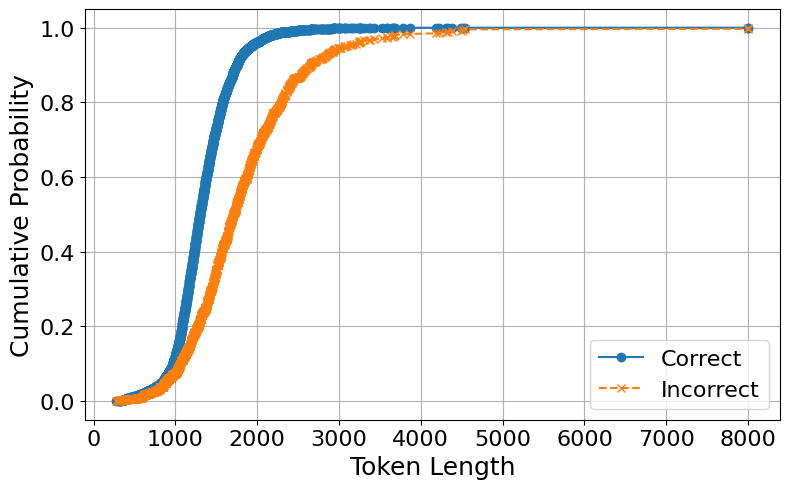

In [69]:
import matplotlib.pyplot as plt

# Compute CDFs
cdf_correct = math_val[math_val['is_correct'] == True]["token_lengths"] \
    .value_counts(normalize=True).sort_index().cumsum()
cdf_incorrect = math_val[math_val['is_correct'] == False]["token_lengths"] \
    .value_counts(normalize=True).sort_index().cumsum()

# Align indices to ensure both series have the same x-axis range
all_lengths = sorted(set(cdf_correct.index).union(set(cdf_incorrect.index)))
cdf_correct = cdf_correct.reindex(all_lengths, method='ffill').fillna(0)
cdf_incorrect = cdf_incorrect.reindex(all_lengths, method='ffill').fillna(0)

# Plot both CDFs
plt.figure(figsize=(8, 5))
plt.plot(all_lengths, cdf_correct, label='Correct', linestyle='-', marker='o')
plt.plot(all_lengths, cdf_incorrect, label='Incorrect', linestyle='--', marker='x')

# Customize labels and font size
plt.xlabel('Token Length', fontsize=18)
plt.ylabel('Cumulative Probability', fontsize=18)
# plt.title('CDF of Token Lengths by Correctness', fontsize=18)
plt.tick_params(axis='both', labelsize=16)
plt.legend(fontsize=16)
plt.grid(True)
plt.tight_layout()
plt.savefig('../figures/cdf_token_lengths_l1.png', dpi=300, bbox_inches='tight')
plt.show()


## Average Token Length Per Type and Level

We also look into the average length considering correct and incorrect answers only

In [63]:
grouped_all = math_val.groupby(['type', 'level'])['token_lengths'].agg(['mean', 'std']).reset_index()

grouped_all

,type,level,mean,std
0,Algebra,1.0,1186.500000,318.910049
1,Algebra,2.0,1212.505556,287.981911
2,Algebra,3.0,1240.289362,259.391236
3,Algebra,4.0,1280.889328,305.737002
4,Algebra,5.0,1373.469314,347.006500
5,Counting & Probability,1.0,1223.837838,303.561591
6,Counting & Probability,2.0,1219.946809,264.014066
7,Counting & Probability,3.0,1324.177083,292.059078
8,Counting & Probability,4.0,1420.785714,321.694363
9,Counting & Probability,5.0,1601.684685,704.634205


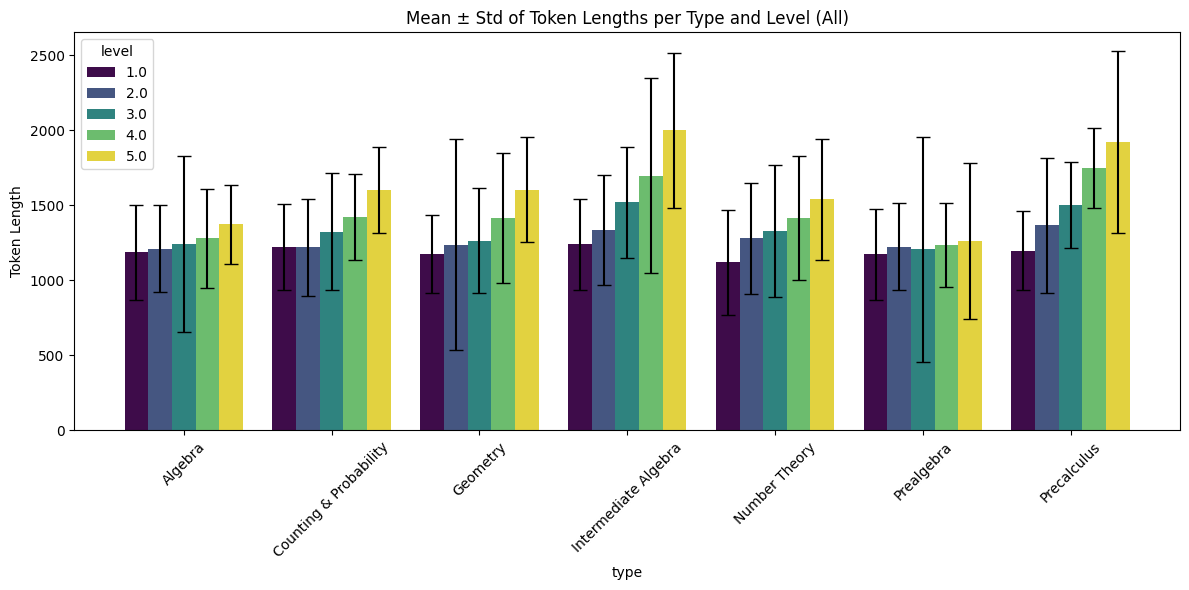

In [64]:
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns

# Group by type and level, calculate mean and std
grouped_all = math_val.groupby(['type', 'level'])['token_lengths'].agg(['mean', 'std']).reset_index()

plt.figure(figsize=(12, 6))
ax = sns.barplot(data=grouped_all, x='type', y='mean', hue='level', palette='viridis')

# Add error bars: match each row in grouped_all to a bar
for (i, row), bar in zip(grouped_all.iterrows(), ax.patches):
    height = bar.get_height()
    x = bar.get_x() + bar.get_width() / 2
    ax.errorbar(x=x, y=height, yerr=row['std'], fmt='none', c='black', capsize=5)


plt.title('Mean ± Std of Token Lengths per Type and Level (All)')
plt.ylabel('Token Length')
plt.xticks(rotation=45)
plt.tight_layout()
plt.show()

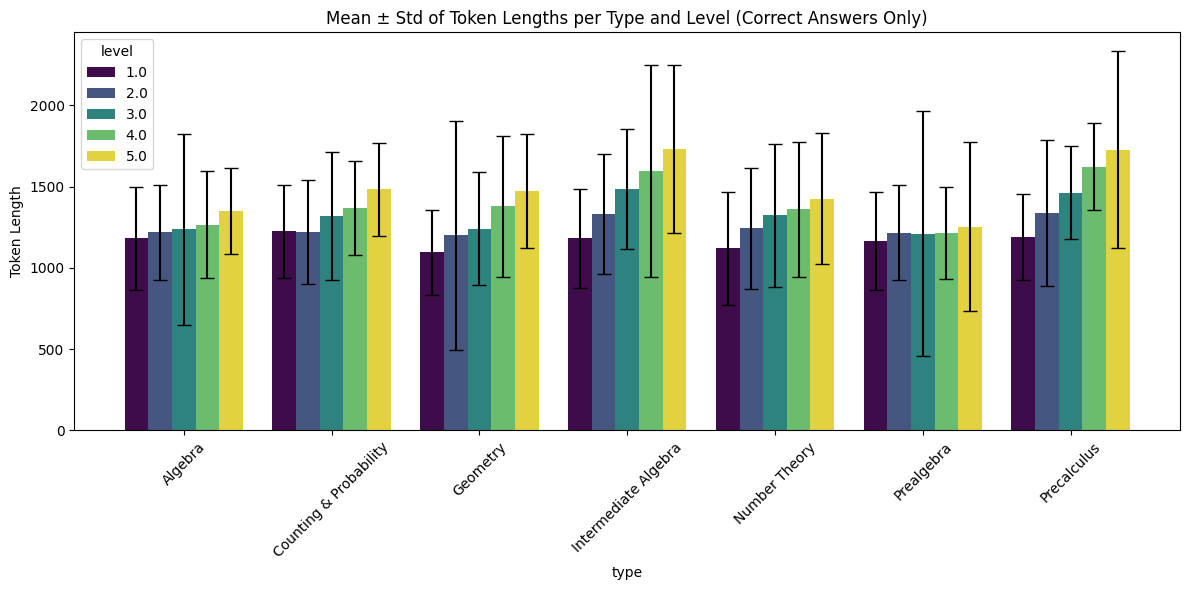

In [65]:
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns

# CORRECT ANSWERS ONLY
correct = math_val[math_val['is_correct'] == True]
grouped_correct = correct.groupby(['type', 'level'])['token_lengths'].agg(['mean', 'std']).reset_index()

plt.figure(figsize=(12, 6))
ax = sns.barplot(data=grouped_correct, x='type', y='mean', hue='level', palette='viridis')

# Add error bars: match each row in grouped_all to a bar
for (i, row), bar in zip(grouped_all.iterrows(), ax.patches):
    height = bar.get_height()
    x = bar.get_x() + bar.get_width() / 2
    ax.errorbar(x=x, y=height, yerr=row['std'], fmt='none', c='black', capsize=5)


plt.title('Mean ± Std of Token Lengths per Type and Level (Correct Answers Only)')
plt.ylabel('Token Length')
plt.xticks(rotation=45)
plt.tight_layout()
plt.show()

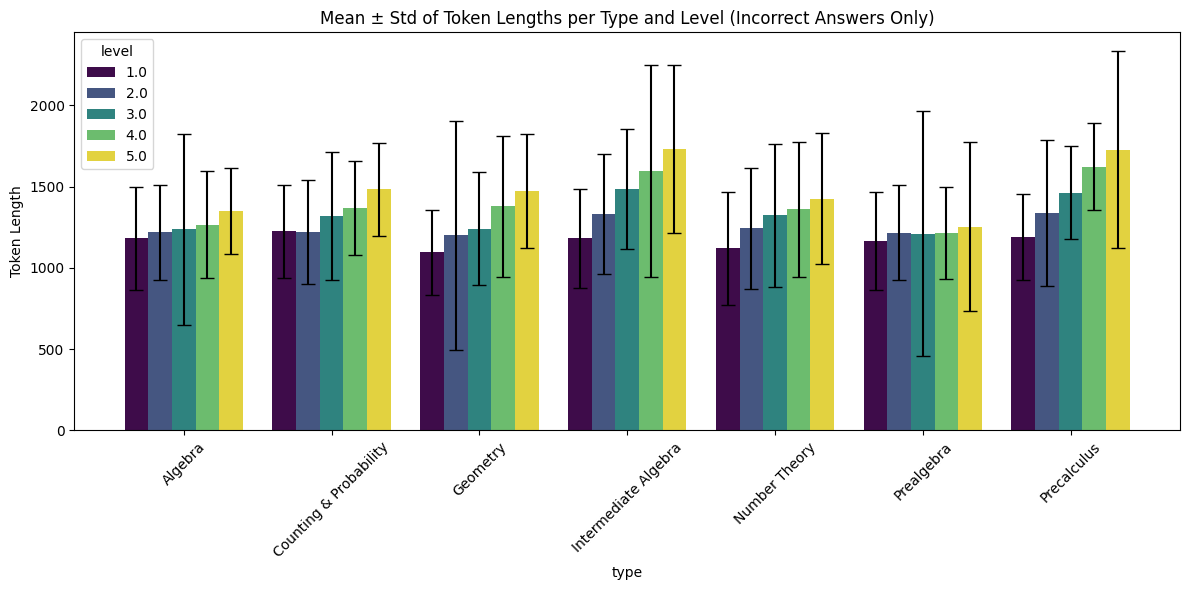

In [66]:
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns

# CORRECT ANSWERS ONLY
incorrect = math_val[math_val['is_correct'] == False]
grouped_incorrect = incorrect.groupby(['type', 'level'])['token_lengths'].agg(['mean', 'std']).reset_index()

plt.figure(figsize=(12, 6))
ax = sns.barplot(data=grouped_correct, x='type', y='mean', hue='level', palette='viridis')

# Add error bars: match each row in grouped_all to a bar
for (i, row), bar in zip(grouped_all.iterrows(), ax.patches):
    height = bar.get_height()
    x = bar.get_x() + bar.get_width() / 2
    ax.errorbar(x=x, y=height, yerr=row['std'], fmt='none', c='black', capsize=5)


plt.title('Mean ± Std of Token Lengths per Type and Level (Incorrect Answers Only)')
plt.ylabel('Token Length')
plt.xticks(rotation=45)
plt.tight_layout()
plt.show()

In [67]:
# TABLE SUMMARY
grouped_all['group'] = 'all'
grouped_correct['group'] = 'correct'
grouped_incorrect['group'] = 'incorrect'

token_length_summary = pd.concat([grouped_all, grouped_correct, grouped_incorrect], ignore_index=True)
token_length_summary = token_length_summary.sort_values(by=['type', 'level']).reset_index(drop=True)

token_length_summary

,type,level,mean,std,group
0,Algebra,1.0,1186.500000,318.910049,all
1,Algebra,1.0,1181.508772,321.426226,correct
2,Algebra,1.0,1328.750000,216.770808,incorrect
3,Algebra,2.0,1212.505556,287.981911,all
4,Algebra,2.0,1220.301136,281.374494,correct
...,...,...,...,...,...
99,Precalculus,4.0,1623.128571,400.748753,correct
100,Precalculus,4.0,2038.548387,638.360444,incorrect
101,Precalculus,5.0,1921.528455,605.536618,all
102,Precalculus,5.0,1726.913043,418.627229,correct


## Average Token Length Per Level ONLY

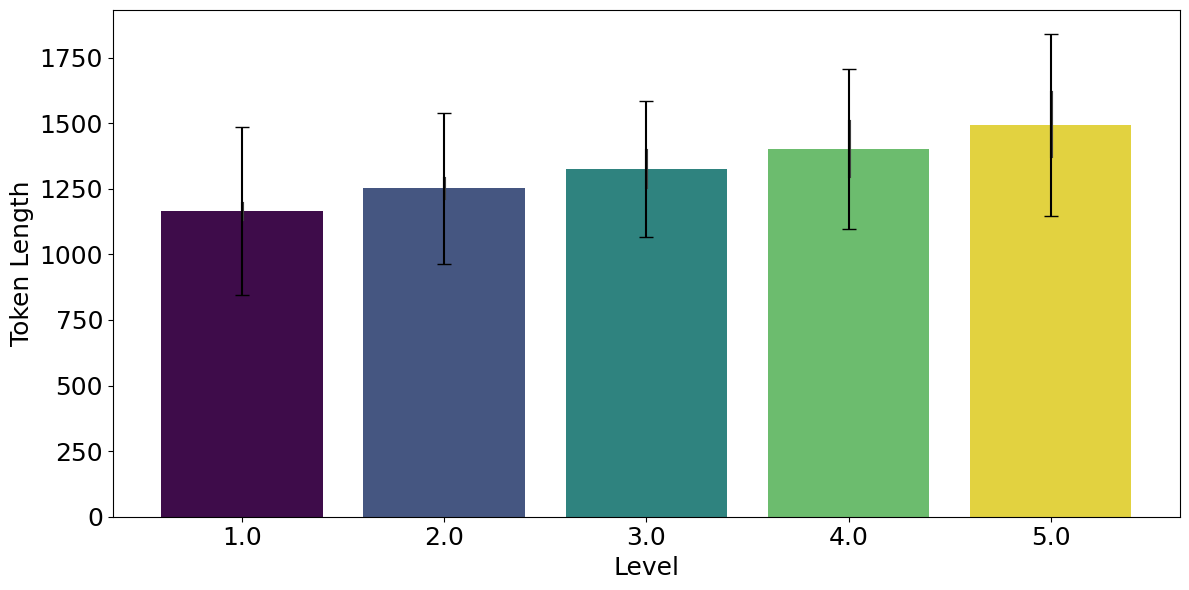

In [75]:
grouped_lvl_all = math_val.groupby('level')['token_lengths'].agg(['mean', 'std']).reset_index()

plt.figure(figsize=(12, 6))
ax = sns.barplot(
    data=grouped_correct, x='level', y='mean', hue='level', 
    palette='viridis', legend=False
)

# Add error bars
for (i, row), bar in zip(grouped_all.iterrows(), ax.patches):
    height = bar.get_height()
    x = bar.get_x() + bar.get_width() / 2
    ax.errorbar(x=x, y=height, yerr=row['std'], fmt='none', c='black', capsize=5)

# Set font sizes
ax.set_xlabel('Level', fontsize=18)
ax.set_ylabel('Token Length', fontsize=18)
ax.tick_params(axis='both', labelsize=18)

plt.tight_layout()
plt.savefig('../figures/mean_std_tokens_level_l1.png', dpi=300, bbox_inches='tight')
plt.show()

## Average Token Length Per Type ONLY

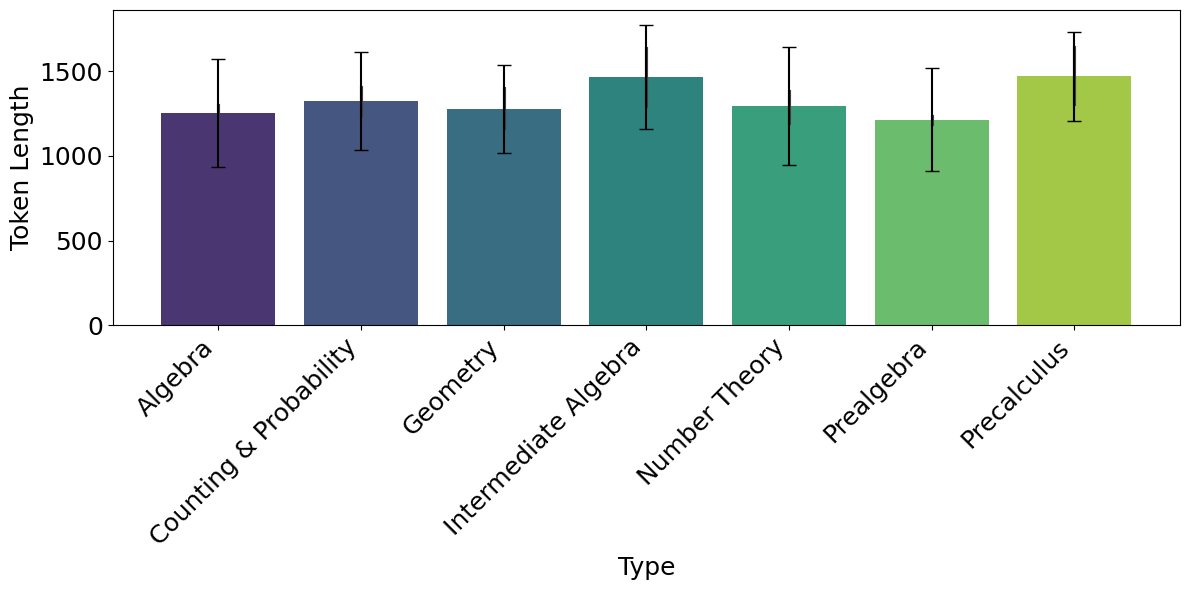

In [76]:
grouped_type_all = math_val.groupby('type')['token_lengths'].agg(['mean', 'std']).reset_index()

plt.figure(figsize=(12, 6))
ax = sns.barplot(
    data=grouped_correct, x='type', y='mean', hue='type', 
    palette='viridis', legend=False
)

# Add error bars
for (i, row), bar in zip(grouped_all.iterrows(), ax.patches):
    height = bar.get_height()
    x = bar.get_x() + bar.get_width() / 2
    ax.errorbar(x=x, y=height, yerr=row['std'], fmt='none', c='black', capsize=5)

# Set font sizes
ax.set_xlabel('Type', fontsize=18)
ax.set_ylabel('Token Length', fontsize=18)
ax.tick_params(axis='both', labelsize=18)

plt.xticks(rotation=45, ha='right', fontsize=18)
plt.tight_layout()
plt.savefig('../figures/mean_std_tokens_type_l1.png', dpi=300, bbox_inches='tight')
plt.show()

## Comparison: Average Token Length new vs old

In [170]:
df_old = pd.read_parquet("../eval_results/Responses_L1-Qwen-1.5B-Max_test_no_level_type_3000TargetTokens.parquet")
df_new = pd.read_parquet("../eval_results/Responses_checkpoint-400_test_no_level_type_3000TargetTokens.parquet")

In [171]:
from utils import last_boxed_only_string, remove_boxed
import numpy as np

def extract_answer(solution_str: str) -> str:
    """Extract the final boxed answer from a solution string."""
    return remove_boxed(last_boxed_only_string(solution_str))

df_old["level"] = df_old["extra_info"].apply(lambda d: d.get("level") if isinstance(d, dict) else None)
df_old["type"] = df_old["extra_info"].apply(lambda d: d.get("type") if isinstance(d, dict) else None)
df_old["ground_truth"] = df_old["reward_model"].apply(lambda d: d["ground_truth"])
df_old["responses"] = df_old["responses"].apply(lambda x: x[0] if isinstance(x, np.ndarray) and len(x) == 1 else x)
df_old["answer"] = df_old["responses"].apply(lambda r: extract_answer(r) if r else None)
df_old["token_lengths"] = df_old["token_lengths"].apply(lambda x: x[0] if isinstance(x, np.ndarray) and len(x) == 1 else x)
df_old["is_correct"] = df_old["is_correct"].apply(lambda x: x[0] if isinstance(x, np.ndarray) and len(x) == 1 else x)
df_old["rewards"] = df_old["rewards"].apply(lambda x: x[0] if isinstance(x, np.ndarray) and len(x) == 1 else x)

df_new["level"] = df_new["extra_info"].apply(lambda d: d.get("level") if isinstance(d, dict) else None)
df_new["type"] = df_new["extra_info"].apply(lambda d: d.get("type") if isinstance(d, dict) else None)
df_new["ground_truth"] = df_new["reward_model"].apply(lambda d: d["ground_truth"])
df_new["responses"] = df_new["responses"].apply(lambda x: x[0] if isinstance(x, np.ndarray) and len(x) == 1 else x)
df_new["answer"] = df_new["responses"].apply(lambda r: extract_answer(r) if r else None)
df_new["token_lengths"] = df_new["token_lengths"].apply(lambda x: x[0] if isinstance(x, np.ndarray) and len(x) == 1 else x)
df_new["is_correct"] = df_new["is_correct"].apply(lambda x: x[0] if isinstance(x, np.ndarray) and len(x) == 1 else x)
df_new["rewards"] = df_new["rewards"].apply(lambda x: x[0] if isinstance(x, np.ndarray) and len(x) == 1 else x)

In [172]:
# Calculate mean and std for token lengths in the old dataset
print(df_old[df_old['is_correct'] == True]['token_lengths'].mean())
print(df_old[df_old['is_correct'] == True]['token_lengths'].std())

# Calculate mean and std for token lengths in the new dataset
print(df_new[df_new['is_correct'] == True]['token_lengths'].mean())
print(df_new[df_new['is_correct'] == True]['token_lengths'].std())

1306.0722891566265
330.74834571257804
1035.4378109452737
356.9841497255807


In [173]:
df_combined = pd.DataFrame({
    'level': df_new['level'],
    'type': df_new['type'],
    'token_lengths_new': df_new['token_lengths'],
    'token_lengths_old': df_old['token_lengths'],
    'ground_truth': df_new['ground_truth'],
    'answer_new': df_new['answer'],
    'answer_old': df_old['answer'],
    'is_correct_new': df_new['is_correct'],
    'is_correct_old': df_old['is_correct'],
    'reward_new': df_new['rewards'],
    'reward_old': df_old['rewards']
})

df_combined

,level,type,token_lengths_new,token_lengths_old,ground_truth,answer_new,answer_old,is_correct_new,is_correct_old,reward_new,reward_old
0,4.0,Algebra,1175,1662,12,12,12,1,1,0.952245,0.892472
1,2.0,Algebra,474,1380,8000,8000,8000,1,1,0.985154,0.932794
2,5.0,Algebra,1077,2320,10,10,8.09,1,0,0.959441,-1.000000
3,2.0,Algebra,452,1028,4005,4005,4005,1,1,0.985688,0.962622
4,3.0,Algebra,521,1096,\frac{\sqrt{3}}{3},\frac{\sqrt{3}}{3},\frac{\sqrt{3}}{3},1,1,0.983944,0.958136
...,...,...,...,...,...,...,...,...,...,...,...
495,3.0,Intermediate Algebra,792,1526,12,12,12,1,1,0.974777,0.914280
496,5.0,Intermediate Algebra,931,1581,81,81,81,1,1,0.968201,0.906051
497,5.0,Intermediate Algebra,2625,2812,\frac{17}{21},\dfrac{1125}{6643},\dfrac{5}{12},0,0,-1.000000,-1.000000
498,4.0,Intermediate Algebra,2887,2278,40,40 + 4\sqrt{41},2\sqrt{69},0,0,-1.000000,-1.000000


### Hypothesis Test

In [174]:
df_for_hypo_test = df_combined[['type','level','token_lengths_new','token_lengths_old','is_correct_new','is_correct_old']].copy()

In [175]:
# OVERALL DF
from scipy.stats import wilcoxon
from statsmodels.stats.contingency_tables import mcnemar

# Wilcoxon test on entire dataset for token length reduction
before_tokens = df_for_hypo_test['token_lengths_old']
after_tokens = df_for_hypo_test['token_lengths_new']

# Test if token lengths decreased after fine-tuning (one-sided)
wilcoxon_stat, wilcoxon_p = wilcoxon(before_tokens, after_tokens, alternative='greater')

print(f'Wilcoxon test statistic: {wilcoxon_stat}')
print(f'Wilcoxon p-value: {wilcoxon_p}')

# McNemar test on entire dataset for accuracy change
before_corr = df_for_hypo_test['is_correct_old']
after_corr = df_for_hypo_test['is_correct_new']

a = sum((before_corr == 1) & (after_corr == 1))
b = sum((before_corr == 1) & (after_corr == 0))
c = sum((before_corr == 0) & (after_corr == 1))
d = sum((before_corr == 0) & (after_corr == 0))

contingency_table = [[a, b],
                     [c, d]]

mcnemar_result = mcnemar(contingency_table, exact=True)

print(f"McNemar's test statistic: {mcnemar_result.statistic}")
print(f"McNemar's p-value: {mcnemar_result.pvalue}")


Wilcoxon test statistic: 101495.0
Wilcoxon p-value: 3.276522238482621e-34
McNemar's test statistic: 21.0
McNemar's p-value: 0.10478948242660333


In [156]:
import pandas as pd
from scipy.stats import wilcoxon
from statsmodels.stats.contingency_tables import mcnemar
from statsmodels.stats.multitest import multipletests

results = []

grouped = df_for_hypo_test.groupby(['type', 'level'])

for (subject, difficulty), group in grouped:
    before_tokens = group['token_lengths_old']
    after_tokens = group['token_lengths_new']
    
    # Wilcoxon signed-rank test on token lengths (alternative='greater' = before > after)
    stat_len, p_val_len = wilcoxon(before_tokens, after_tokens, alternative='greater')
    
    # Prepare contingency table for McNemar's test
    # Table counts how many changed from correct to incorrect or vice versa
    # 2x2 table: 
    #              after_correct
    #           | 1       | 0
    #  -------------------------
    # before 1 | a       | b
    # before 0 | c       | d
    
    before_corr = group['is_correct_old']
    after_corr = group['is_correct_new']
    
    a = sum((before_corr == 1) & (after_corr == 1))
    b = sum((before_corr == 1) & (after_corr == 0))
    c = sum((before_corr == 0) & (after_corr == 1))
    d = sum((before_corr == 0) & (after_corr == 0))
    
    table = [[a, b],
             [c, d]]
    
    # McNemar test, exact=True recommended for small samples
    result_mcnemar = mcnemar(table, exact=True)
    
    results.append({
        'subject': subject,
        'difficulty': difficulty,
        'wilcoxon_stat': stat_len,
        'p_value_token_len': p_val_len,
        'mcnemar_stat': result_mcnemar.statistic,
        'p_value_accuracy': result_mcnemar.pvalue,
        'n_samples': len(group)
    })

results_df = pd.DataFrame(results)

# Correct for multiple tests separately for token length and accuracy tests
results_df['p_adj_token_len'] = multipletests(results_df['p_value_token_len'], method='fdr_bh')[1]
results_df['p_adj_accuracy'] = multipletests(results_df['p_value_accuracy'], method='fdr_bh')[1]

# Flag significant results
results_df['significant_token_len'] = results_df['p_adj_token_len'] < 0.05
results_df['significant_accuracy'] = results_df['p_adj_accuracy'] < 0.05


results_df.to_csv('../eval_results/tests/no_lt_wilcoxon_mcnemar_per_lt.csv', index=False)
results_df

,subject,difficulty,wilcoxon_stat,p_value_token_len,mcnemar_stat,p_value_accuracy,n_samples,p_adj_token_len,p_adj_accuracy,significant_token_len,significant_accuracy
0,Algebra,1.0,102.0,0.113660,0.0,1.000,17,0.147337,1.0,False,False
1,Algebra,2.0,215.0,0.000271,0.0,1.000,21,0.002375,1.0,True,False
2,Algebra,3.0,315.0,0.000198,1.0,1.000,26,0.002375,1.0,True,False
3,Algebra,4.0,385.0,0.000566,0.0,0.125,30,0.003960,1.0,True,False
4,Algebra,5.0,345.0,0.009830,1.0,0.375,30,0.028672,1.0,True,False
5,Counting & Probability,1.0,2.0,0.500000,0.0,1.000,2,0.514706,1.0,False,False
6,Counting & Probability,2.0,16.0,0.406250,1.0,1.000,7,0.444336,1.0,False,False
7,Counting & Probability,3.0,10.0,0.062500,0.0,1.000,4,0.095109,1.0,False,False
8,Counting & Probability,4.0,75.0,0.019897,0.0,1.000,13,0.041166,1.0,True,False
9,Counting & Probability,5.0,62.0,0.038574,0.0,0.500,12,0.066935,1.0,False,False


In [157]:
import pandas as pd
from scipy.stats import wilcoxon
from statsmodels.stats.multitest import multipletests

# Example: Wilcoxon test per 'level'
grouped_level = df_for_hypo_test.groupby('level')

results = []
alpha = 0.05

for level, group in grouped_level:
    before = group['token_lengths_old']
    after = group['token_lengths_new']
    
    # Wilcoxon signed-rank test (testing if old > new, i.e., token lengths reduced)
    stat, p_val = wilcoxon(before, after, alternative='greater')
    
    results.append({'level': level, 'wilcoxon_stat': stat, 'p_value': p_val})

results_df = pd.DataFrame(results)

# Apply multiple test correction (Benjamini-Hochberg FDR)
results_df['p_adj'] = multipletests(results_df['p_value'], method='fdr_bh')[1]

# Add significance flag
results_df['significant'] = results_df['p_adj'] < alpha

results_df.to_csv('../eval_results/tests/no_lt_wilcoxon_per_level.csv', index=False)
results_df

,level,wilcoxon_stat,p_value,p_adj,significant
0,1.0,716.0,1.671827e-03,1.671827e-03,True
1,2.0,3518.0,1.640567e-09,4.101417e-09,True
2,3.0,4419.0,8.401264e-08,1.050158e-07,True
3,4.0,6972.0,6.736034e-12,3.368017e-11,True
4,5.0,6913.5,1.692810e-08,2.821351e-08,True


In [158]:
import pandas as pd
from scipy.stats import wilcoxon
from statsmodels.stats.multitest import multipletests

# Example: Wilcoxon test per 'level'
grouped_level = df_for_hypo_test.groupby('type')

results = []
alpha = 0.05

for level, group in grouped_level:
    before = group['token_lengths_old']
    after = group['token_lengths_new']
    
    # Wilcoxon signed-rank test (testing if old > new, i.e., token lengths reduced)
    stat, p_val = wilcoxon(before, after, alternative='greater')
    
    results.append({'level': level, 'wilcoxon_stat': stat, 'p_value': p_val})

results_df = pd.DataFrame(results)

# Apply multiple test correction (Benjamini-Hochberg FDR)
results_df['p_adj'] = multipletests(results_df['p_value'], method='fdr_bh')[1]

# Add significance flag
results_df['significant'] = results_df['p_adj'] < alpha

results_df.to_csv('../eval_results/tests/no_lt_wilcoxon_per_type.csv', index=False)
results_df

,level,wilcoxon_stat,p_value,p_adj,significant
0,Algebra,6456.5,6.074839e-11,4.252387e-10,True
1,Counting & Probability,569.5,1.950683e-03,2.275796e-03,True
2,Geometry,634.5,4.102289e-03,4.102289e-03,True
3,Intermediate Algebra,3803.0,3.520230e-08,1.232081e-07,True
4,Number Theory,1664.0,7.172258e-07,1.255145e-06,True
5,Prealgebra,2836.0,7.824275e-08,1.825664e-07,True
6,Precalculus,1236.0,1.765702e-04,2.471983e-04,True


In [159]:
import pandas as pd
from statsmodels.stats.contingency_tables import mcnemar
from statsmodels.stats.multitest import multipletests

# Example: McNemar test per 'level'
grouped_level = df_for_hypo_test.groupby('level')

results = []
alpha = 0.05

for level, group in grouped_level:
    before_corr = group['is_correct_old']
    after_corr = group['is_correct_new']
    
    # Build contingency table for McNemar's test
    a = sum((before_corr == 1) & (after_corr == 1))
    b = sum((before_corr == 1) & (after_corr == 0))
    c = sum((before_corr == 0) & (after_corr == 1))
    d = sum((before_corr == 0) & (after_corr == 0))
    
    table = [[a, b],
             [c, d]]
    
    # McNemar test with exact p-value for small samples
    result = mcnemar(table, exact=True)
    
    results.append({'level': level,
                    'mcnemar_stat': result.statistic,
                    'p_value': result.pvalue})

results_df = pd.DataFrame(results)

# Multiple test correction
results_df['p_adj'] = multipletests(results_df['p_value'], method='fdr_bh')[1]

# Add significance flag
results_df['significant'] = results_df['p_adj'] < alpha

results_df.to_csv('../eval_results/tests/no_lt_mcnemar_per_level.csv', index=False)
results_df

,level,mcnemar_stat,p_value,p_adj,significant
0,1.0,0.0,0.125000,0.299276,False
1,2.0,1.0,1.000000,1.000000,False
2,3.0,1.0,0.125000,0.299276,False
3,4.0,4.0,0.179565,0.299276,False
4,5.0,13.0,0.850554,1.000000,False


In [160]:
import pandas as pd
from statsmodels.stats.contingency_tables import mcnemar
from statsmodels.stats.multitest import multipletests

# Example: McNemar test per 'level'
grouped_level = df_for_hypo_test.groupby('type')

results = []
alpha = 0.05

for level, group in grouped_level:
    before_corr = group['is_correct_old']
    after_corr = group['is_correct_new']
    
    # Build contingency table for McNemar's test
    a = sum((before_corr == 1) & (after_corr == 1))
    b = sum((before_corr == 1) & (after_corr == 0))
    c = sum((before_corr == 0) & (after_corr == 1))
    d = sum((before_corr == 0) & (after_corr == 0))
    
    table = [[a, b],
             [c, d]]
    
    # McNemar test with exact p-value for small samples
    result = mcnemar(table, exact=True)
    
    results.append({'level': level,
                    'mcnemar_stat': result.statistic,
                    'p_value': result.pvalue})

results_df = pd.DataFrame(results)

# Multiple test correction
results_df['p_adj'] = multipletests(results_df['p_value'], method='fdr_bh')[1]

# Add significance flag
results_df['significant'] = results_df['p_adj'] < alpha

results_df.to_csv('../eval_results/tests/no_lt_mcnemar_per_type.csv', index=False)
results_df

,level,mcnemar_stat,p_value,p_adj,significant
0,Algebra,5.0,0.774414,0.903483,False
1,Counting & Probability,1.0,0.625000,0.875000,False
2,Geometry,1.0,0.625000,0.875000,False
3,Intermediate Algebra,7.0,1.000000,1.000000,False
4,Number Theory,0.0,0.125000,0.875000,False
5,Prealgebra,3.0,0.507812,0.875000,False
6,Precalculus,2.0,0.453125,0.875000,False


In [100]:
# Case 1: New is incorrect, Old is correct
new_wrong_old_right = df_combined[(df_combined['is_correct_new'] == False) & 
                                  (df_combined['is_correct_old'] == True)]

# Case 2: New is correct, Old is incorrect
new_right_old_wrong = df_combined[(df_combined['is_correct_new'] == True) & 
                                  (df_combined['is_correct_old'] == False)]


In [101]:
new_wrong_old_right

,level,type,token_lengths_new,token_lengths_old,ground_truth,answer_new,answer_old,is_correct_new,is_correct_old,reward_new,reward_old
22,3.0,Algebra,3001,1348,\frac{14}{3},None,\dfrac{14}{3},0,1,-1.0,0.936285
23,4.0,Algebra,3001,1586,-1,None,-1,0,1,-1.0,0.905265
32,4.0,Algebra,595,923,81,83,81,0,1,-1.0,0.968623
39,1.0,Algebra,3001,1325,4,None,4,0,1,-1.0,0.938681
72,5.0,Algebra,1234,1191,11,21,11,0,1,-1.0,0.950954
74,4.0,Algebra,2584,1927,129,500,129,0,1,-1.0,0.832761
89,4.0,Algebra,771,1169,2107,20965,2107,0,1,-1.0,0.952720
127,3.0,Precalculus,2072,2316,30^\circ,90,30,0,1,-1.0,0.680181
144,3.0,Precalculus,2331,1515,\frac{1}{8},\dfrac{\sqrt{5} - 1}{2},\dfrac{1}{8},0,1,-1.0,0.915837
149,4.0,Precalculus,1482,1941,288 \pi,1728\pi,288\pi,0,1,-1.0,0.828813


In [102]:
new_right_old_wrong

,level,type,token_lengths_new,token_lengths_old,ground_truth,answer_new,answer_old,is_correct_new,is_correct_old,reward_new,reward_old
2,5.0,Algebra,1077,2320,10,10,8.09,1,0,0.959441,-1.0
40,5.0,Algebra,1527,1343,"\$32,\!348",32348,32397,1,0,0.914137,-1.0
43,5.0,Algebra,1653,2178,3,3,2,1,0,0.894072,-1.0
87,5.0,Algebra,888,2024,5,5,4,1,0,0.970401,-1.0
101,3.0,Algebra,1138,1470,\frac{\sqrt{3}}{3},\dfrac{\sqrt{3}}{3},\dfrac{\sqrt[4]{27}}{3},1,0,0.955101,-1.0
142,5.0,Precalculus,1381,2001,7,7,\dfrac{\sqrt{10910}}{15},1,0,0.932682,-1.0
166,4.0,Precalculus,977,1236,\pi,\pi,\dfrac{\pi}{3},1,0,0.965668,-1.0
200,5.0,Prealgebra,646,1389,64,64,48,1,0,0.980225,-1.0
239,5.0,Prealgebra,1223,2011,\frac{270}7\text{ degrees},\dfrac{270}{7},\dfrac{30}{1},1,0,0.948267,-1.0
253,4.0,Prealgebra,584,1419,5,5,270,1,0,0.982166,-1.0


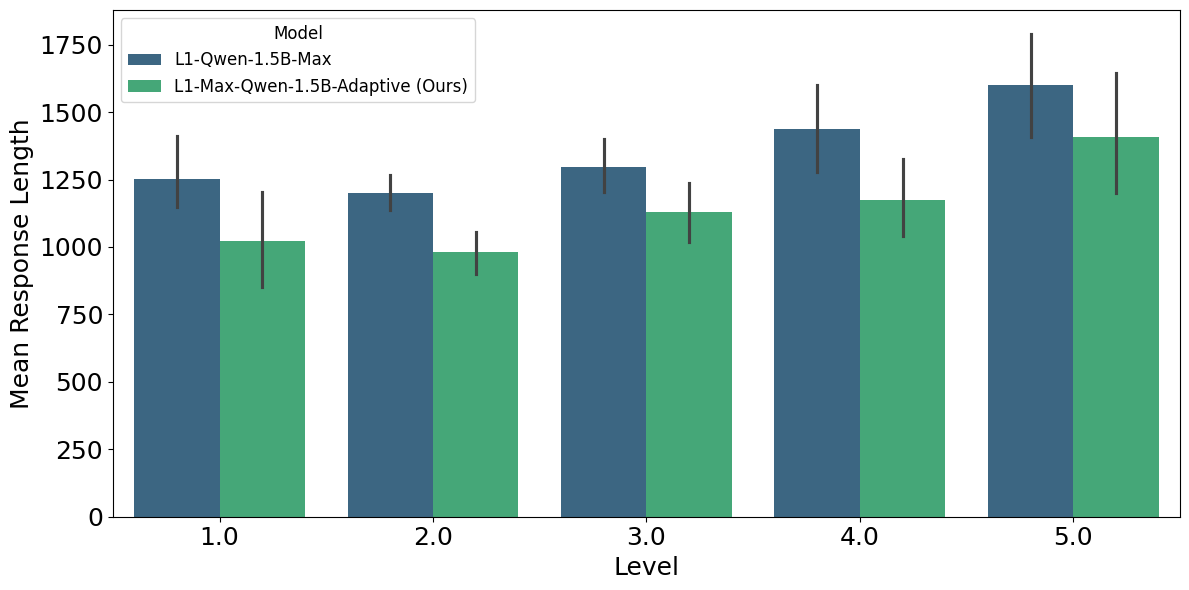

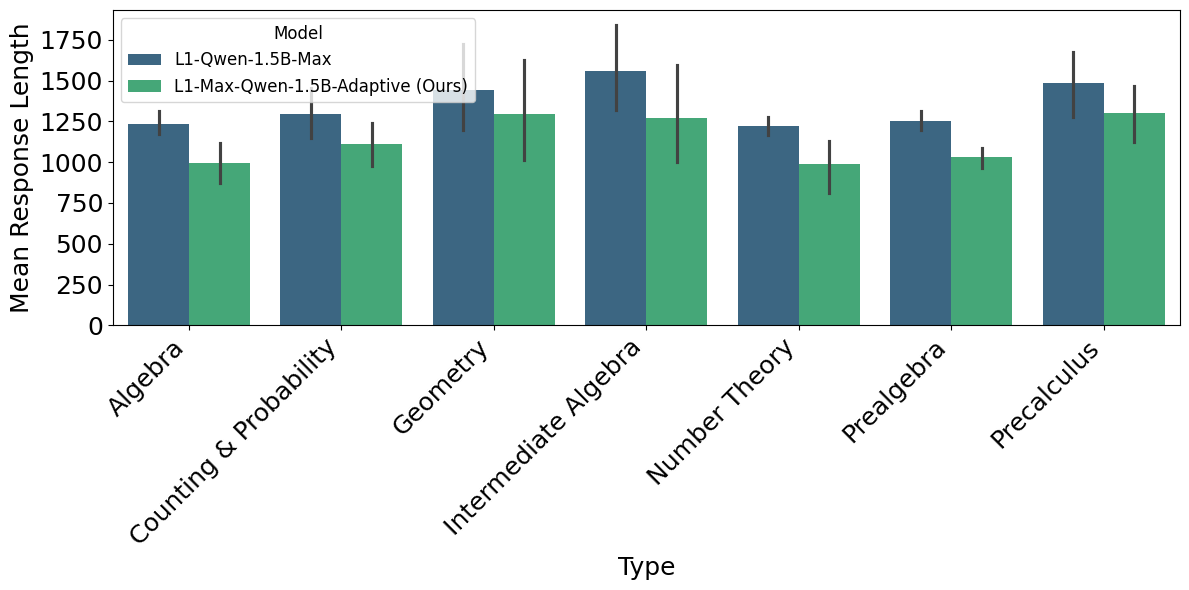

In [103]:
import pandas as pd
import seaborn as sns
import matplotlib.pyplot as plt

# Compute mean token lengths per level and type
df_grouped = df_combined.groupby(['level', 'type'])[['token_lengths_new', 'token_lengths_old']].mean().reset_index()
df_grouped = df_grouped.rename(columns={
    'token_lengths_old': 'L1-Qwen-1.5B-Max',
    'token_lengths_new': 'L1-Max-Qwen-1.5B-Adaptive (Ours)'
})

# Melt the DataFrame so we can plot both token lengths in one go
df_melted = df_grouped.melt(id_vars=['level', 'type'], 
                            value_vars=['L1-Qwen-1.5B-Max', 'L1-Max-Qwen-1.5B-Adaptive (Ours)'], 
                            var_name='Model', value_name='Mean Response Length')


# Plot mean token lengths grouped by level
plt.figure(figsize=(12, 6))
sns.barplot(data=df_melted, x='level', y='Mean Response Length', hue='Model', 
            palette='viridis', dodge=True)

plt.xlabel('Level', fontsize=18)
plt.ylabel('Mean Response Length', fontsize=18)
plt.xticks(fontsize=18)
plt.yticks(fontsize=18)
plt.legend(title='Model', fontsize=12, title_fontsize=12, loc='upper left')

plt.tight_layout()
plt.savefig('../figures/mean_response_per_level_noltprompt.png', dpi=300, bbox_inches='tight')
plt.show()

# Plot mean token lengths grouped by type
plt.figure(figsize=(12, 6))
sns.barplot(data=df_melted, x='type', y='Mean Response Length', hue='Model', 
            palette='viridis', dodge=True)

plt.xlabel('Type', fontsize=18)
plt.ylabel('Mean Response Length', fontsize=18)
plt.xticks(fontsize=18, rotation=45, ha='right')
plt.yticks(fontsize=18)
plt.legend(title='Model', fontsize=12, title_fontsize=12, loc='upper left')

plt.tight_layout()
plt.savefig('../figures/mean_response_per_type_noltprompt.png', dpi=300, bbox_inches='tight')
plt.show()

### New prompt (w_level_type)

In [176]:
df_old = pd.read_parquet("../eval_results/Responses_L1-Qwen-1.5B-Max_test_w_level_type_3000TargetTokens.parquet")
df_new = pd.read_parquet("../eval_results/Responses_checkpoint-400_test_w_level_type_3000TargetTokens.parquet")

In [177]:
from utils import last_boxed_only_string, remove_boxed
import numpy as np

def extract_answer(solution_str: str) -> str:
    """Extract the final boxed answer from a solution string."""
    return remove_boxed(last_boxed_only_string(solution_str))

df_old["level"] = df_old["extra_info"].apply(lambda d: d.get("level") if isinstance(d, dict) else None)
df_old["type"] = df_old["extra_info"].apply(lambda d: d.get("type") if isinstance(d, dict) else None)
df_old["ground_truth"] = df_old["reward_model"].apply(lambda d: d["ground_truth"])
df_old["responses"] = df_old["responses"].apply(lambda x: x[0] if isinstance(x, np.ndarray) and len(x) == 1 else x)
df_old["answer"] = df_old["responses"].apply(lambda r: extract_answer(r) if r else None)
df_old["token_lengths"] = df_old["token_lengths"].apply(lambda x: x[0] if isinstance(x, np.ndarray) and len(x) == 1 else x)
df_old["is_correct"] = df_old["is_correct"].apply(lambda x: x[0] if isinstance(x, np.ndarray) and len(x) == 1 else x)
df_old["rewards"] = df_old["rewards"].apply(lambda x: x[0] if isinstance(x, np.ndarray) and len(x) == 1 else x)

df_new["level"] = df_new["extra_info"].apply(lambda d: d.get("level") if isinstance(d, dict) else None)
df_new["type"] = df_new["extra_info"].apply(lambda d: d.get("type") if isinstance(d, dict) else None)
df_new["ground_truth"] = df_new["reward_model"].apply(lambda d: d["ground_truth"])
df_new["responses"] = df_new["responses"].apply(lambda x: x[0] if isinstance(x, np.ndarray) and len(x) == 1 else x)
df_new["answer"] = df_new["responses"].apply(lambda r: extract_answer(r) if r else None)
df_new["token_lengths"] = df_new["token_lengths"].apply(lambda x: x[0] if isinstance(x, np.ndarray) and len(x) == 1 else x)
df_new["is_correct"] = df_new["is_correct"].apply(lambda x: x[0] if isinstance(x, np.ndarray) and len(x) == 1 else x)
df_new["rewards"] = df_new["rewards"].apply(lambda x: x[0] if isinstance(x, np.ndarray) and len(x) == 1 else x)

df_combined = pd.DataFrame({
    'level': df_new['level'],
    'type': df_new['type'],
    'token_lengths_new': df_new['token_lengths'],
    'token_lengths_old': df_old['token_lengths'],
    'ground_truth': df_new['ground_truth'],
    'answer_new': df_new['answer'],
    'answer_old': df_old['answer'],
    'is_correct_new': df_new['is_correct'],
    'is_correct_old': df_old['is_correct'],
    'reward_new': df_new['rewards'],
    'reward_old': df_old['rewards']
})

df_combined

,level,type,token_lengths_new,token_lengths_old,ground_truth,answer_new,answer_old,is_correct_new,is_correct_old,reward_new,reward_old
0,4.0,Algebra,780,1530,12,12,12,1,1,0.975276,0.913706
1,2.0,Algebra,1410,711,8000,8000,8000,1,1,0.929349,0.977962
2,5.0,Algebra,1381,700,10,10,10\%,1,1,0.932682,0.978363
3,2.0,Algebra,492,1444,4005,4005,4005,1,1,0.984701,0.925230
4,3.0,Algebra,478,534,\frac{\sqrt{3}}{3},\dfrac{\sqrt{3}}{3},\dfrac{\sqrt{3}}{3},1,1,0.985054,0.983592
...,...,...,...,...,...,...,...,...,...,...,...
495,3.0,Intermediate Algebra,1381,1619,12,12,12,1,1,0.932682,0.899908
496,5.0,Intermediate Algebra,1083,1710,81,91,81,0,1,-1.000000,0.883516
497,5.0,Intermediate Algebra,2330,2271,\frac{17}{21},\infty,\dfrac{20}{3},0,0,-1.000000,-1.000000
498,4.0,Intermediate Algebra,2865,3001,40,40,40,1,0,0.201484,-1.000000


In [178]:
# Calculate mean and std for token lengths in the old dataset
print(df_old[df_old['is_correct'] == True]['token_lengths'].mean())
print(df_old[df_old['is_correct'] == True]['token_lengths'].std())

# Calculate mean and std for token lengths in the new dataset
print(df_new[df_new['is_correct'] == True]['token_lengths'].mean())
print(df_new[df_new['is_correct'] == True]['token_lengths'].std())

1490.443373493976
445.3157605751354
1261.0841836734694
559.1498575761823


### Hypothesis Test

In [179]:
df_for_hypo_test = df_combined[['type','level','token_lengths_new','token_lengths_old','is_correct_new','is_correct_old']].copy()

In [180]:
# OVERALL DF
from scipy.stats import wilcoxon
from statsmodels.stats.contingency_tables import mcnemar

# Wilcoxon test on entire dataset for token length reduction
before_tokens = df_for_hypo_test['token_lengths_old']
after_tokens = df_for_hypo_test['token_lengths_new']

# Test if token lengths decreased after fine-tuning (one-sided)
wilcoxon_stat, wilcoxon_p = wilcoxon(before_tokens, after_tokens, alternative='greater')

print(f'Wilcoxon test statistic: {wilcoxon_stat}')
print(f'Wilcoxon p-value: {wilcoxon_p}')

# McNemar test on entire dataset for accuracy change
before_corr = df_for_hypo_test['is_correct_old']
after_corr = df_for_hypo_test['is_correct_new']

a = sum((before_corr == 1) & (after_corr == 1))
b = sum((before_corr == 1) & (after_corr == 0))
c = sum((before_corr == 0) & (after_corr == 1))
d = sum((before_corr == 0) & (after_corr == 0))

contingency_table = [[a, b],
                     [c, d]]

mcnemar_result = mcnemar(contingency_table, exact=True)

print(f"McNemar's test statistic: {mcnemar_result.statistic}")
print(f"McNemar's p-value: {mcnemar_result.pvalue}")


Wilcoxon test statistic: 83138.5
Wilcoxon p-value: 4.979509572225257e-13
McNemar's test statistic: 20.0
McNemar's p-value: 0.005152397042092064


In [165]:
import pandas as pd
from scipy.stats import wilcoxon
from statsmodels.stats.contingency_tables import mcnemar
from statsmodels.stats.multitest import multipletests

results = []

grouped = df_for_hypo_test.groupby(['type', 'level'])

for (subject, difficulty), group in grouped:
    before_tokens = group['token_lengths_old']
    after_tokens = group['token_lengths_new']
    
    # Wilcoxon signed-rank test on token lengths (alternative='greater' = before > after)
    stat_len, p_val_len = wilcoxon(before_tokens, after_tokens, alternative='greater')
    
    # Prepare contingency table for McNemar's test
    # Table counts how many changed from correct to incorrect or vice versa
    # 2x2 table: 
    #              after_correct
    #           | 1       | 0
    #  -------------------------
    # before 1 | a       | b
    # before 0 | c       | d
    
    before_corr = group['is_correct_old']
    after_corr = group['is_correct_new']
    
    a = sum((before_corr == 1) & (after_corr == 1))
    b = sum((before_corr == 1) & (after_corr == 0))
    c = sum((before_corr == 0) & (after_corr == 1))
    d = sum((before_corr == 0) & (after_corr == 0))
    
    table = [[a, b],
             [c, d]]
    
    # McNemar test, exact=True recommended for small samples
    result_mcnemar = mcnemar(table, exact=True)
    
    results.append({
        'subject': subject,
        'difficulty': difficulty,
        'wilcoxon_stat': stat_len,
        'p_value_token_len': p_val_len,
        'mcnemar_stat': result_mcnemar.statistic,
        'p_value_accuracy': result_mcnemar.pvalue,
        'n_samples': len(group)
    })

results_df = pd.DataFrame(results)

# Correct for multiple tests separately for token length and accuracy tests
results_df['p_adj_token_len'] = multipletests(results_df['p_value_token_len'], method='fdr_bh')[1]
results_df['p_adj_accuracy'] = multipletests(results_df['p_value_accuracy'], method='fdr_bh')[1]

# Flag significant results
results_df['significant_token_len'] = results_df['p_adj_token_len'] < 0.05
results_df['significant_accuracy'] = results_df['p_adj_accuracy'] < 0.05


results_df.to_csv('../eval_results/tests/w_lt_wilcoxon_mcnemar_per_lt.csv', index=False)
results_df

,subject,difficulty,wilcoxon_stat,p_value_token_len,mcnemar_stat,p_value_accuracy,n_samples,p_adj_token_len,p_adj_accuracy,significant_token_len,significant_accuracy
0,Algebra,1.0,104.0,0.103447,0.0,1.000000,17,0.241376,1.0,False,False
1,Algebra,2.0,161.0,0.059671,0.0,1.000000,21,0.168269,1.0,False,False
2,Algebra,3.0,261.0,0.014575,0.0,0.500000,26,0.072877,1.0,False,False
3,Algebra,4.0,323.0,0.031778,0.0,0.500000,30,0.139030,1.0,False,False
4,Algebra,5.0,243.0,0.419696,0.0,0.250000,30,0.544051,1.0,False,False
5,Counting & Probability,1.0,3.0,0.250000,0.0,1.000000,2,0.378825,1.0,False,False
6,Counting & Probability,2.0,24.0,0.054688,0.0,1.000000,7,0.168269,1.0,False,False
7,Counting & Probability,3.0,3.0,0.812500,0.0,1.000000,4,0.812500,1.0,False,False
8,Counting & Probability,4.0,71.0,0.038696,1.0,1.000000,13,0.150486,1.0,False,False
9,Counting & Probability,5.0,29.0,0.649902,0.0,0.500000,12,0.710831,1.0,False,False


In [164]:
import pandas as pd
from scipy.stats import wilcoxon
from statsmodels.stats.multitest import multipletests

# Example: Wilcoxon test per 'level'
grouped_level = df_for_hypo_test.groupby('level')

results = []
alpha = 0.05

for level, group in grouped_level:
    before = group['token_lengths_old']
    after = group['token_lengths_new']
    
    # Wilcoxon signed-rank test (testing if old > new, i.e., token lengths reduced)
    stat, p_val = wilcoxon(before, after, alternative='greater')
    
    results.append({'level': level, 'wilcoxon_stat': stat, 'p_value': p_val})

results_df = pd.DataFrame(results)

# Apply multiple test correction (Benjamini-Hochberg FDR)
results_df['p_adj'] = multipletests(results_df['p_value'], method='fdr_bh')[1]

# Add significance flag
results_df['significant'] = results_df['p_adj'] < alpha

results_df.to_csv('../eval_results/tests/w_lt_wilcoxon_per_level.csv', index=False)
results_df

,level,wilcoxon_stat,p_value,p_adj,significant
0,1.0,660.0,0.011972,0.014965,True
1,2.0,2914.0,0.000245,0.000408,True
2,3.0,4114.5,0.000010,0.000026,True
3,4.0,5839.5,0.000010,0.000026,True
4,5.0,4746.5,0.050272,0.050272,False


In [166]:
import pandas as pd
from scipy.stats import wilcoxon
from statsmodels.stats.multitest import multipletests

# Example: Wilcoxon test per 'level'
grouped_level = df_for_hypo_test.groupby('type')

results = []
alpha = 0.05

for level, group in grouped_level:
    before = group['token_lengths_old']
    after = group['token_lengths_new']
    
    # Wilcoxon signed-rank test (testing if old > new, i.e., token lengths reduced)
    stat, p_val = wilcoxon(before, after, alternative='greater')
    
    results.append({'level': level, 'wilcoxon_stat': stat, 'p_value': p_val})

results_df = pd.DataFrame(results)

# Apply multiple test correction (Benjamini-Hochberg FDR)
results_df['p_adj'] = multipletests(results_df['p_value'], method='fdr_bh')[1]

# Add significance flag
results_df['significant'] = results_df['p_adj'] < alpha

results_df.to_csv('../eval_results/tests/w_lt_wilcoxon_per_type.csv', index=False)
results_df

,level,wilcoxon_stat,p_value,p_adj,significant
0,Algebra,5148.0,0.000751,0.001751,True
1,Counting & Probability,495.0,0.015196,0.021274,True
2,Geometry,521.5,0.033238,0.038778,True
3,Intermediate Algebra,2782.0,0.011140,0.019495,True
4,Number Theory,1557.0,0.000024,0.000165,True
5,Prealgebra,2510.5,0.000092,0.000322,True
6,Precalculus,926.0,0.095595,0.095595,False


In [167]:
import pandas as pd
from statsmodels.stats.contingency_tables import mcnemar
from statsmodels.stats.multitest import multipletests

# Example: McNemar test per 'level'
grouped_level = df_for_hypo_test.groupby('level')

results = []
alpha = 0.05

for level, group in grouped_level:
    before_corr = group['is_correct_old']
    after_corr = group['is_correct_new']
    
    # Build contingency table for McNemar's test
    a = sum((before_corr == 1) & (after_corr == 1))
    b = sum((before_corr == 1) & (after_corr == 0))
    c = sum((before_corr == 0) & (after_corr == 1))
    d = sum((before_corr == 0) & (after_corr == 0))
    
    table = [[a, b],
             [c, d]]
    
    # McNemar test with exact p-value for small samples
    result = mcnemar(table, exact=True)
    
    results.append({'level': level,
                    'mcnemar_stat': result.statistic,
                    'p_value': result.pvalue})

results_df = pd.DataFrame(results)

# Multiple test correction
results_df['p_adj'] = multipletests(results_df['p_value'], method='fdr_bh')[1]

# Add significance flag
results_df['significant'] = results_df['p_adj'] < alpha

results_df.to_csv('../eval_results/tests/w_lt_mcnemar_per_level.csv', index=False)
results_df

,level,mcnemar_stat,p_value,p_adj,significant
0,1.0,0.0,0.500000,0.625000,False
1,2.0,2.0,1.000000,1.000000,False
2,3.0,4.0,0.179565,0.438627,False
3,4.0,7.0,0.263176,0.438627,False
4,5.0,7.0,0.133801,0.438627,False


In [168]:
import pandas as pd
from statsmodels.stats.contingency_tables import mcnemar
from statsmodels.stats.multitest import multipletests

# Example: McNemar test per 'level'
grouped_level = df_for_hypo_test.groupby('type')

results = []
alpha = 0.05

for level, group in grouped_level:
    before_corr = group['is_correct_old']
    after_corr = group['is_correct_new']
    
    # Build contingency table for McNemar's test
    a = sum((before_corr == 1) & (after_corr == 1))
    b = sum((before_corr == 1) & (after_corr == 0))
    c = sum((before_corr == 0) & (after_corr == 1))
    d = sum((before_corr == 0) & (after_corr == 0))
    
    table = [[a, b],
             [c, d]]
    
    # McNemar test with exact p-value for small samples
    result = mcnemar(table, exact=True)
    
    results.append({'level': level,
                    'mcnemar_stat': result.statistic,
                    'p_value': result.pvalue})

results_df = pd.DataFrame(results)

# Multiple test correction
results_df['p_adj'] = multipletests(results_df['p_value'], method='fdr_bh')[1]

# Add significance flag
results_df['significant'] = results_df['p_adj'] < alpha

results_df.to_csv('../eval_results/tests/w_lt_mcnemar_per_type.csv', index=False)
results_df

,level,mcnemar_stat,p_value,p_adj,significant
0,Algebra,0.0,0.015625,0.109375,False
1,Counting & Probability,1.0,0.625000,1.000000,False
2,Geometry,1.0,1.000000,1.000000,False
3,Intermediate Algebra,9.0,0.823803,1.000000,False
4,Number Theory,2.0,1.000000,1.000000,False
5,Prealgebra,2.0,0.453125,1.000000,False
6,Precalculus,5.0,0.143463,0.502121,False


In [106]:
# Case 1: New is incorrect, Old is correct
new_wrong_old_right = df_combined[(df_combined['is_correct_new'] == False) & 
                                  (df_combined['is_correct_old'] == True)]

# Case 2: New is correct, Old is incorrect
new_right_old_wrong = df_combined[(df_combined['is_correct_new'] == True) & 
                                  (df_combined['is_correct_old'] == False)]

In [107]:
new_wrong_old_right

,level,type,token_lengths_new,token_lengths_old,ground_truth,answer_new,answer_old,is_correct_new,is_correct_old,reward_new,reward_old
26,5.0,Algebra,3001,1883,6,None,6,0,1,-1.0,0.844587
38,4.0,Algebra,3001,1599,\frac{11}{2},None,\dfrac{11}{2},0,1,-1.0,0.903190
60,3.0,Algebra,789,911,11,9,11,0,1,-1.0,0.969244
63,5.0,Algebra,1552,1156,\$18.90,15,18.90,0,1,-1.0,0.953733
84,5.0,Algebra,13,1945,600,240,600,0,1,-1.0,0.827668
85,4.0,Algebra,863,1414,13,12,13,0,1,-1.0,0.928876
122,3.0,Algebra,300,1253,-128,12,-128,0,1,-1.0,0.945615
131,4.0,Precalculus,1775,1895,\begin{pmatrix} -7 \\ 16 \\ 5 \end{pmatrix},\begin{pmatrix} -30 \\ -30 \\ 120 \end{pmatrix},\begin{pmatrix} -7 \\ 16 \\ 5 \end{pmatrix},0,1,-1.0,0.841447
132,3.0,Precalculus,3001,2164,\frac{8}{15},None,\dfrac{8}{15},0,1,-1.0,0.751754
133,2.0,Precalculus,1906,1332,\frac{9}{100},-\dfrac{9}{100},0.09,0,1,-1.0,0.937961


In [108]:
new_right_old_wrong

,level,type,token_lengths_new,token_lengths_old,ground_truth,answer_new,answer_old,is_correct_new,is_correct_old,reward_new,reward_old
146,5.0,Precalculus,1721,2378,\begin{pmatrix} 1/5 \\ -18/5 \end{pmatrix},\begin{pmatrix} \dfrac{1}{5} \\ -\dfrac{18}{5}...,\begin{pmatrix} -\dfrac{17}{5} \\ \dfrac{6}{5}...,1,0,0.881361,-1.0
148,4.0,Precalculus,1073,2842,12,12,5,1,0,0.959711,-1.0
150,3.0,Precalculus,1599,2372,3 \sqrt{5},3\sqrt{5},\dfrac{\sqrt{129}}{2},1,0,0.903190,-1.0
171,5.0,Precalculus,1321,1928,27,27,31,1,0,0.939089,-1.0
175,3.0,Precalculus,1757,2821,11,11,7,1,0,0.874024,-1.0
223,3.0,Prealgebra,713,3001,29,29,29,1,0,0.977889,-1.0
254,5.0,Prealgebra,2043,1210,4,4,1,1,0,0.797091,-1.0
263,5.0,Geometry,2197,2323,145^\circ,145,70,1,0,0.737718,-1.0
335,3.0,Number Theory,1798,2048,2220,2220,200220,1,0,0.865115,-1.0
346,4.0,Number Theory,2265,1603,2516_8,2516_8,2526_8,1,0,0.706242,-1.0


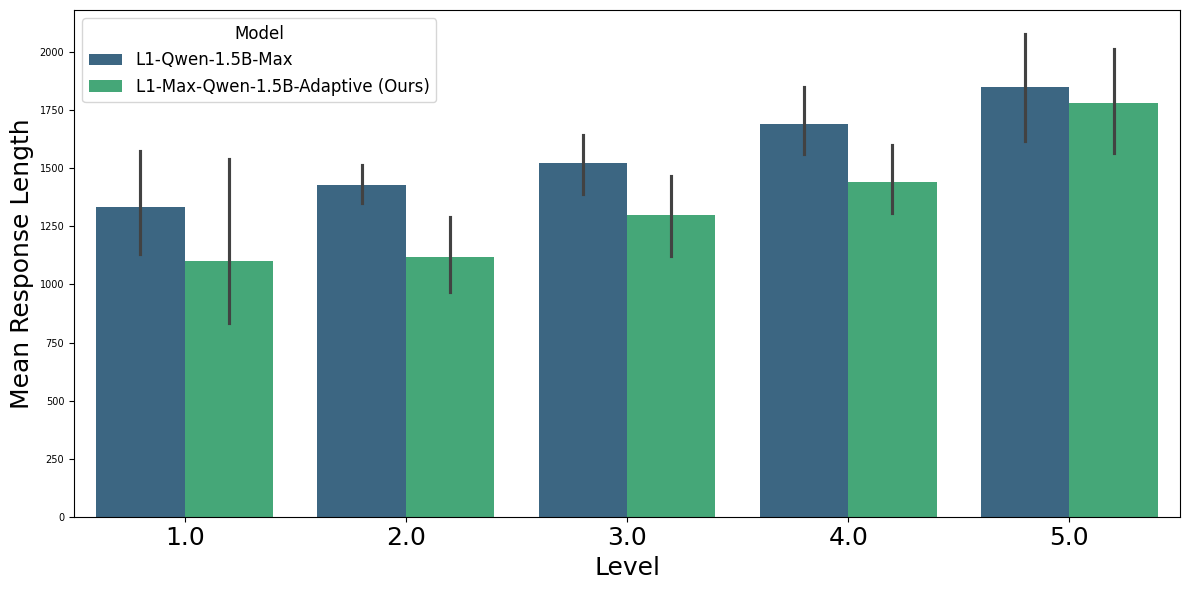

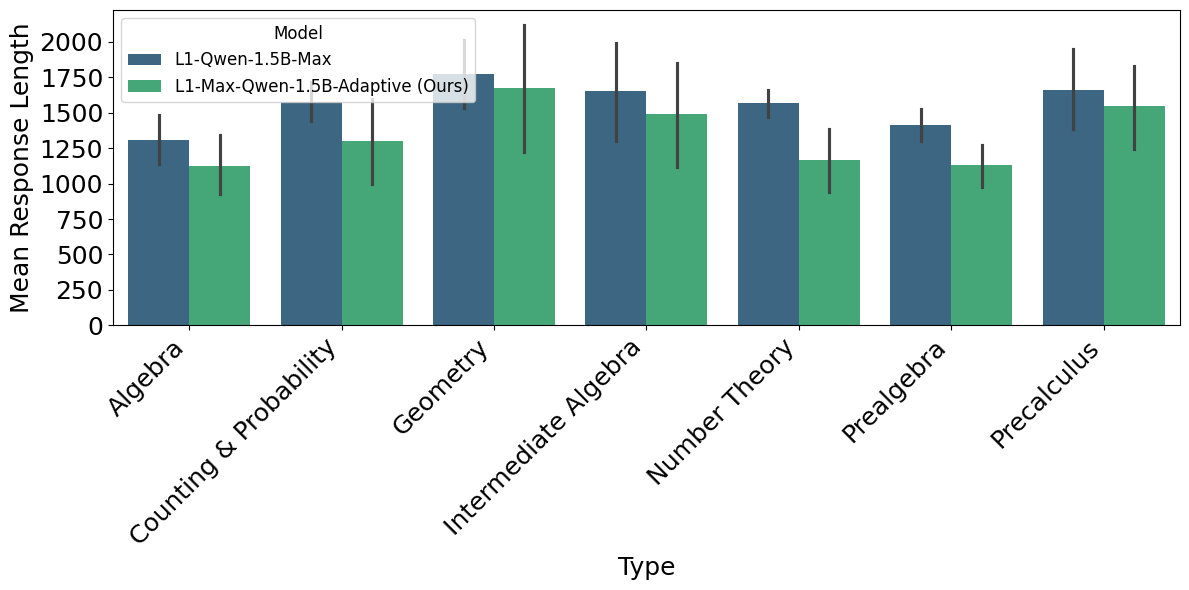

In [109]:
import pandas as pd
import seaborn as sns
import matplotlib.pyplot as plt

# Compute mean token lengths per level and type
df_grouped = df_combined.groupby(['level', 'type'])[['token_lengths_new', 'token_lengths_old']].mean().reset_index()
df_grouped = df_grouped.rename(columns={
    'token_lengths_old': 'L1-Qwen-1.5B-Max',
    'token_lengths_new': 'L1-Max-Qwen-1.5B-Adaptive (Ours)'
})

# Melt the DataFrame so we can plot both token lengths in one go
df_melted = df_grouped.melt(id_vars=['level', 'type'], 
                            value_vars=['L1-Qwen-1.5B-Max', 'L1-Max-Qwen-1.5B-Adaptive (Ours)'], 
                            var_name='Model', value_name='Mean Response Length')

# Plot mean token lengths grouped by level
plt.figure(figsize=(12, 6))
sns.barplot(data=df_melted, x='level', y='Mean Response Length', hue='Model', 
            palette='viridis', dodge=True)

plt.xlabel('Level', fontsize=18)
plt.ylabel('Mean Response Length', fontsize=18)
plt.xticks(fontsize=18)
plt.yticks(fontsize=7)
plt.legend(title='Model', fontsize=12, title_fontsize=12, loc='upper left')

plt.tight_layout()
plt.savefig('../figures/mean_response_per_level_wltprompt.png', dpi=300, bbox_inches='tight')
plt.show()

# Plot mean token lengths grouped by type
plt.figure(figsize=(12, 6))
sns.barplot(data=df_melted, x='type', y='Mean Response Length', hue='Model', 
            palette='viridis', dodge=True)

plt.xlabel('Type', fontsize=18)
plt.ylabel('Mean Response Length', fontsize=18)
plt.xticks(fontsize=18, rotation=45, ha='right')
plt.yticks(fontsize=18)
plt.legend(title='Model', fontsize=12, title_fontsize=12, loc='upper left')

plt.tight_layout()
plt.savefig('../figures/mean_response_per_type_wltprompt.png', dpi=300, bbox_inches='tight')
plt.show()

## DRAFT (Finish incomplete eval runs)

In [19]:
import os
import csv
import pandas as pd
from tabulate import tabulate
from tqdm import tqdm
import sys
import numpy as np

# Add the project root (one level up from explore/)
project_root = os.path.abspath(os.path.join(os.getcwd(), ".."))
if project_root not in sys.path:
    sys.path.insert(0, project_root)

import importlib
import scripts.math_reward

importlib.reload(scripts.math_reward)

from scripts.math_reward import math_reward_fn

output_dir = "../eval_results"
n_samples = 1
model_path = "models/L1-Qwen-1.5B-Max"
data_path = "MATH_processed/w_level_type/test.parquet"
max_new_tokens = 2000
batch_size = 32


def evaluate_responses(responses, ground_truths, target_tokens, token_lengths):
    total_scores = []
    total_rewards = []
    passes = 0
    for resp_list, gt, target, used in tqdm(zip(responses, ground_truths, target_tokens, token_lengths), total=len(responses), desc="Evaluating"):
        rewards_list = [math_reward_fn(r, gt, target, u) for r, u in zip(list(resp_list), list(token_lengths))]
        total_rewards.append(rewards_list)
        score_list = [0 if reward == -1 else 1 for reward in rewards_list]
        total_scores.append(score_list)
        if np.max(score_list) == 1:
            passes += 1
    pass_at_1 = np.mean([s[0] for s in total_scores])
    pass_at_n = passes / len(responses)
    return pass_at_1, pass_at_n, total_scores, total_rewards


df = pd.read_parquet("../eval_results/Responses_L1-Qwen-1.5B-Max_test_w_level_type.parquet")

# Extract model name and split name from paths
model_name = os.path.basename(model_path.rstrip("/"))
split_name = os.path.splitext(os.path.basename(data_path))[0]

prompts = [p[0]["content"] if isinstance(p, np.ndarray) and len(p) > 0 else "" for p in df["prompt"]]
ground_truths = [rm["ground_truth"] for rm in df["reward_model"]]
target_tokens = [rm["num_tokens"] for rm in df["reward_model"]]

prompt_type = os.path.normpath(data_path).split(os.sep)[1]

responses = df["responses"]
token_lengths = df["token_lengths"]

# Evaluate
pass_at_1, pass_at_n, total_scores, total_rewards = evaluate_responses(responses, ground_truths, target_tokens, token_lengths)
print(f"pass@1: {pass_at_1:.4f}, pass@{n_samples}: {pass_at_n:.4f}")

# Save metrics
csv_path = os.path.join(output_dir, "pass.csv")
row_data = {
    "model_path": model_path,
    "dataset": os.path.basename(data_path),
    "prompt_type": prompt_type,
    "pass@1": pass_at_1,
    f"pass@{n_samples}": pass_at_n
}
file_exists = os.path.isfile(csv_path)
with open(csv_path, mode='a', newline='') as f:
    writer = csv.DictWriter(f, fieldnames=row_data.keys())
    if not file_exists:
        writer.writeheader()
    writer.writerow(row_data)


# Save responses
df["responses"] = responses
df["token_lengths"] = token_lengths
df["is_correct"] = total_scores
df["rewards"] = total_rewards

output_filename = f"Responses_{model_name}_{split_name}_{prompt_type}_{target_tokens[0]}TargetTokens.parquet"
output_parquet = os.path.join(output_dir, output_filename)
df.to_parquet(output_parquet)
print(f"Saved responses to {output_parquet}")

# Print summary
table_data = [[k, v] for k, v in row_data.items()]
print(tabulate(table_data, headers=['Metric', 'Value'], tablefmt='grid'))

Evaluating: 100%|██████████| 500/500 [00:00<00:00, 2829.82it/s]


pass@1: 0.7920, pass@1: 0.7920
Saved responses to ../eval_results/Responses_L1-Qwen-1.5B-Max_test_w_level_type_2000TargetTokens.parquet
+-------------+-------------------------+
| Metric      | Value                   |
+=============+=========================+
| model_path  | models/L1-Qwen-1.5B-Max |
+-------------+-------------------------+
| dataset     | test.parquet            |
+-------------+-------------------------+
| prompt_type | w_level_type            |
+-------------+-------------------------+
| pass@1      | 0.792                   |
+-------------+-------------------------+
